In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-detection-example/fraud_dataset_example.csv


In [5]:
df = pd.read_csv('../input/fraud-detection-example/fraud_dataset_example.csv')
df

step      type      amount     nameOrig  oldbalanceOrg  \
0          1   PAYMENT     9839.64  C1231006815      170136.00   
1          1   PAYMENT     1864.28  C1666544295       21249.00   
2          1  TRANSFER      181.00  C1305486145         181.00   
3          1  CASH_OUT      181.00   C840083671         181.00   
4          1   PAYMENT    11668.14  C2048537720       41554.00   
...      ...       ...         ...          ...            ...   
101608    10   PAYMENT     7477.02   C513257306         785.00   
101609    10  CASH_OUT   282252.35   C210473293      220339.29   
101610    10   PAYMENT    17289.01   C807582280           0.00   
101611    10  TRANSFER  1347146.45  C1315779140        1605.00   
101612    10  CASH_OUT   469539.21   C515691325       31133.00   

        newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0            160296.36  M1979787155            0.00            0.00        0   
1             19384.72  M2044282225            0.00            0.00        0   
2                 0.00   C553264065            0.00            0.00        1   
3                 0.00    C38997010        21182.00            0.00        1   
4             29885.86  M1230701703            0.00            0.00        0   
...                ...          ...             ...             ...      ...   
101608            0.00   M524833426            0.00            0.00        0   
101609            0.00  C1172042998        95156.01        91286.97        0   
101610            0.00   M334249577            0.00            0.00        0   
101611            0.00  C1631408038       541639.43      2186953.43        0   
101612            0.00  C1383702768            0.00       469539.21        0   

        isFlaggedFraud  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
101608               0  
101609               0  
101610               0  
101611               0  
101612               0  

[101613 rows x 11 columns]

In [6]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
df = df[['isFraud',
       'isFlaggedFraud', 'step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest']]
df.head()

isFraud  isFlaggedFraud  step      type    amount     nameOrig  \
0        0               0     1   PAYMENT   9839.64  C1231006815   
1        0               0     1   PAYMENT   1864.28  C1666544295   
2        1               0     1  TRANSFER    181.00  C1305486145   
3        1               0     1  CASH_OUT    181.00   C840083671   
4        0               0     1   PAYMENT  11668.14  C2048537720   

   oldbalanceOrg  newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  
0       170136.0       160296.36  M1979787155             0.0             0.0  
1        21249.0        19384.72  M2044282225             0.0             0.0  
2          181.0            0.00   C553264065             0.0             0.0  
3          181.0            0.00    C38997010         21182.0             0.0  
4        41554.0        29885.86  M1230701703             0.0             0.0

In [11]:
df.head

<bound method NDFrame.head of         isFraud  isFlaggedFraud  step      type      amount     nameOrig  \
0             0               0     1   PAYMENT     9839.64  C1231006815   
1             0               0     1   PAYMENT     1864.28  C1666544295   
2             1               0     1  TRANSFER      181.00  C1305486145   
3             1               0     1  CASH_OUT      181.00   C840083671   
4             0               0     1   PAYMENT    11668.14  C2048537720   
...         ...             ...   ...       ...         ...          ...   
101608        0               0    10   PAYMENT     7477.02   C513257306   
101609        0               0    10  CASH_OUT   282252.35   C210473293   
101610        0               0    10   PAYMENT    17289.01   C807582280   
101611        0               0    10  TRANSFER  1347146.45  C1315779140   
101612        0               0    10  CASH_OUT   469539.21   C515691325   

        oldbalanceOrg  newbalanceOrig     nameDest  oldba

In [13]:
df.describe

<bound method NDFrame.describe of         isFraud  isFlaggedFraud  step      type      amount     nameOrig  \
0             0               0     1   PAYMENT     9839.64  C1231006815   
1             0               0     1   PAYMENT     1864.28  C1666544295   
2             1               0     1  TRANSFER      181.00  C1305486145   
3             1               0     1  CASH_OUT      181.00   C840083671   
4             0               0     1   PAYMENT    11668.14  C2048537720   
...         ...             ...   ...       ...         ...          ...   
101608        0               0    10   PAYMENT     7477.02   C513257306   
101609        0               0    10  CASH_OUT   282252.35   C210473293   
101610        0               0    10   PAYMENT    17289.01   C807582280   
101611        0               0    10  TRANSFER  1347146.45  C1315779140   
101612        0               0    10  CASH_OUT   469539.21   C515691325   

        oldbalanceOrg  newbalanceOrig     nameDest  o

In [15]:
df.describe().T

count          mean           std   min       25%  \
isFraud         101613.0  1.141586e-03  3.376824e-02  0.00      0.00   
isFlaggedFraud  101613.0  0.000000e+00  0.000000e+00  0.00      0.00   
step            101613.0  8.523457e+00  1.820681e+00  1.00      8.00   
amount          101613.0  1.740901e+05  3.450199e+05  0.32  10016.59   
oldbalanceOrg   101613.0  9.071753e+05  2.829575e+06  0.00      0.00   
newbalanceOrig  101613.0  9.234992e+05  2.867319e+06  0.00      0.00   
oldbalanceDest  101613.0  8.810428e+05  2.399949e+06  0.00      0.00   
newbalanceDest  101613.0  1.183998e+06  2.797761e+06  0.00      0.00   

                     50%         75%          max  
isFraud             0.00        0.00         1.00  
isFlaggedFraud      0.00        0.00         0.00  
step                9.00       10.00        10.00  
amount          53385.41   212498.40  10000000.00  
oldbalanceOrg   20190.47   194715.00  38939424.03  
newbalanceOrig      0.00   219217.76  38946233.02  
oldbalanceDest  21058.00   591921.70  34008736.98  
newbalanceDest  51783.43  1063121.64  38946233.02

In [16]:
df.shape

(101613, 11)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   isFraud         101613 non-null  int64  
 1   isFlaggedFraud  101613 non-null  int64  
 2   step            101613 non-null  int64  
 3   type            101613 non-null  object 
 4   amount          101613 non-null  float64
 5   nameOrig        101613 non-null  object 
 6   oldbalanceOrg   101613 non-null  float64
 7   newbalanceOrig  101613 non-null  float64
 8   nameDest        101613 non-null  object 
 9   oldbalanceDest  101613 non-null  float64
 10  newbalanceDest  101613 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB


In [22]:
df.groupby('isFraud').step.count()

isFraud
0    101497
1       116
Name: step, dtype: int64

In [23]:
df.isnull().values.any()

False

In [26]:
import pandas_profiling

pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [37]:
x = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [38]:
from sklearn.model_selection import train_test_split

SEED = 42

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = SEED)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression(max_iter=1000, random_state=SEED)

lr.fit(x_train, y_train)
y_pred =lr.predict(x_test)

print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred)) 
print("F1:",metrics.f1_score(y_test, y_pred))

Acurácia: 0.9989765391276965
Precisão: 0.2
Recall: 0.043478260869565216
F1: 0.07142857142857142


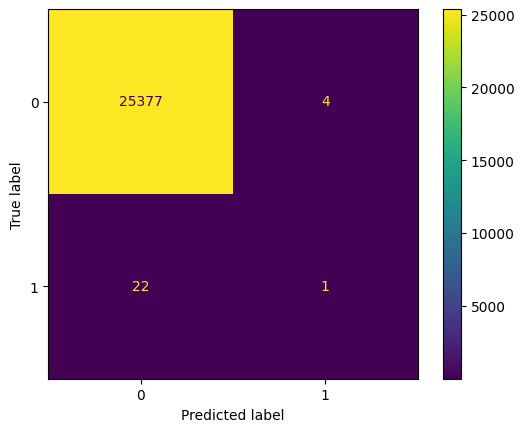

In [40]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

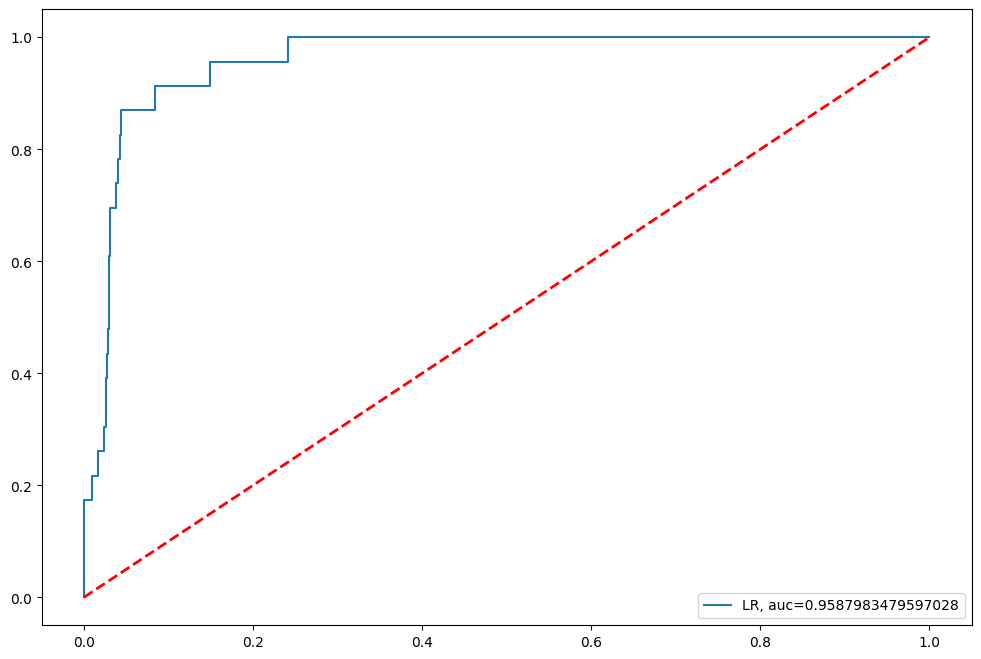

In [41]:
y_pred_proba = lr.predict_proba(x_test)[::, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

In [43]:
from imblearn.over_sampling import SMOTE
import numpy as np

SEED=42

smote = SMOTE(random_state=42)

In [44]:
x = df.drop('isFraud', axis=1)
y = df['isFraud']

In [45]:
x_resampled, y_resampled = smote.fit_resample(x,y)

In [46]:
df_balanced = pd.concat([y_resampled, x_resampled], axis=1)
df_balanced

isFraud  step         amount  oldbalanceOrg  newbalanceOrig  \
0             0     1    9839.640000  170136.000000       160296.36   
1             0     1    1864.280000   21249.000000        19384.72   
2             1     1     181.000000     181.000000            0.00   
3             1     1     181.000000     181.000000            0.00   
4             0     1   11668.140000   41554.000000        29885.86   
...         ...   ...            ...            ...             ...   
202989        1     5   17608.962863   17608.962863            0.00   
202990        1     7   12116.291013   12116.291013            0.00   
202991        1     1  231612.880715  231612.880715            0.00   
202992        1     9  547325.144758  547325.144758            0.00   
202993        1     4  159298.594420  159298.594420            0.00   

        oldbalanceDest  newbalanceDest  type_CASH_IN  type_CASH_OUT  \
0             0.000000        0.000000         False          False   
1             0.000000        0.000000         False          False   
2             0.000000        0.000000         False          False   
3         21182.000000        0.000000         False           True   
4             0.000000        0.000000         False          False   
...                ...             ...           ...            ...   
202989        0.000000        0.000000         False          False   
202990        0.000000        0.000000         False          False   
202991     1945.589357     9370.603471         False           True   
202992        0.000000        0.000000         False          False   
202993        0.000000        0.000000         False          False   

        type_DEBIT  type_PAYMENT  type_TRANSFER  
0            False          True          False  
1            False          True          False  
2            False         False           True  
3            False         False          False  
4            False          True          False  
...            ...           ...            ...  
202989       False         False           True  
202990       False         False           True  
202991       False         False           True  
202992       False         False           True  
202993       False         False           True  

[202994 rows x 12 columns]

In [49]:
df_balanced.groupby('isFraud').step.count()

isFraud
0    101497
1    101497
Name: step, dtype: int64

In [50]:
x = df_balanced.iloc[:, 1:].values
y = df_balanced.iloc[:, 0].values

In [51]:
from sklearn.model_selection import train_test_split

SEED = 42

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = SEED)

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression(max_iter=1000, random_state=SEED)

lr.fit(x_train, y_train)
y_pred =lr.predict(x_test)

print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred)) 
print("F1:",metrics.f1_score(y_test, y_pred))

Acurácia: 0.9417722516699837
Precisão: 0.9241993556945234
Recall: 0.9623125493291239
F1: 0.9428709521507975


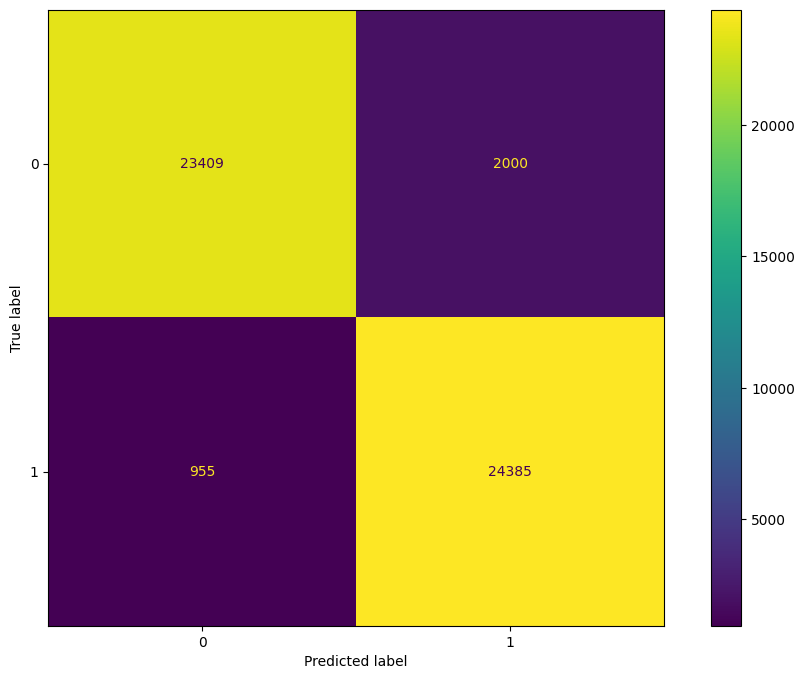

In [53]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

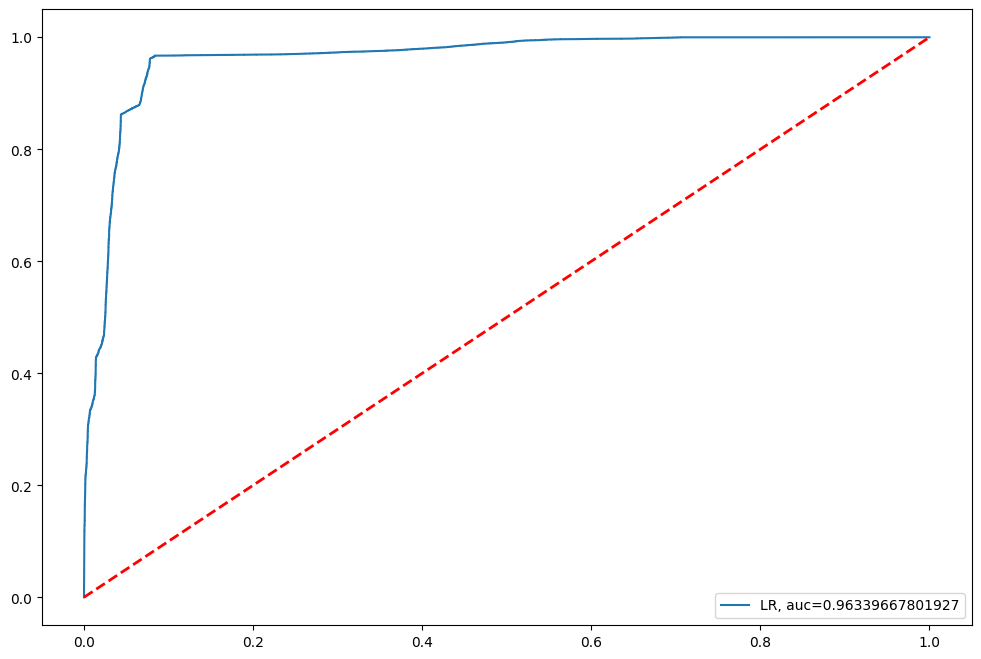

In [54]:
y_pred_proba = lr.predict_proba(x_test)[::, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

In [55]:
pandas_profiling.ProfileReport(df_balanced)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
dt =  DecisionTreeClassifier(max_depth = 5, random_state=SEED)

In [58]:
model = dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred)) 
print("F1:",metrics.f1_score(y_test, y_pred))

Acurácia: 0.9595065912628821
Precisão: 0.9379678742053192
Recall: 0.9839779005524862
F1: 0.9604221635883906


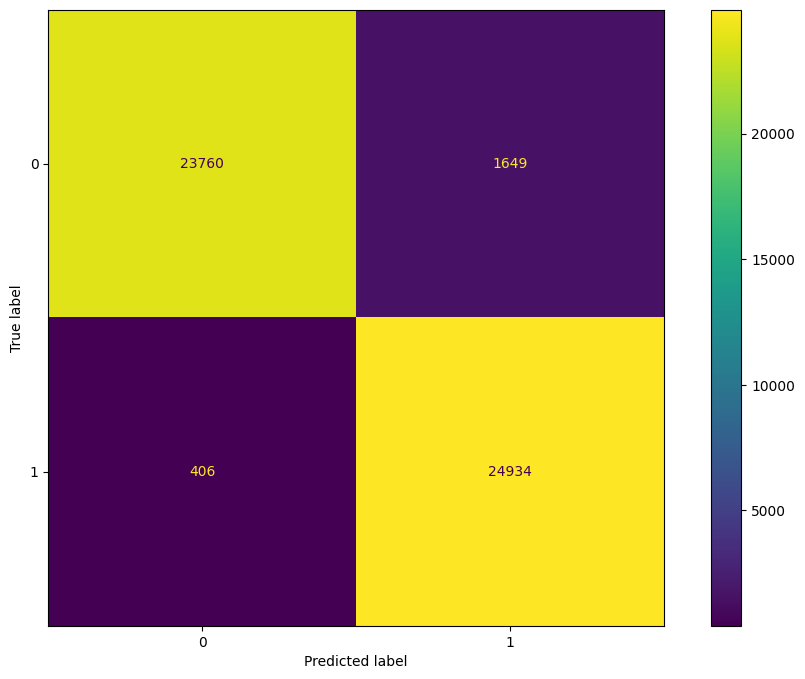

In [59]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

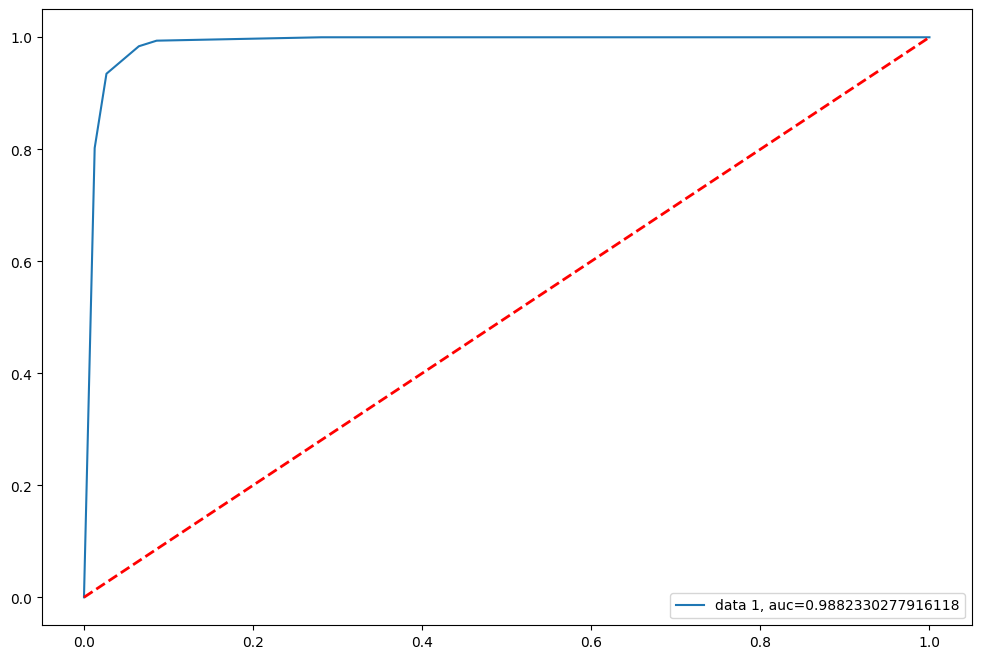

In [60]:
y_pred_proba = dt.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rf = RandomForestClassifier(max_depth= 5, random_state = SEED)

In [63]:
model = rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

Acurácia: 0.9722950205915387
Precisão: 0.9787182974637971
Recall: 0.9655090765588004
F1: 0.9720688148118718


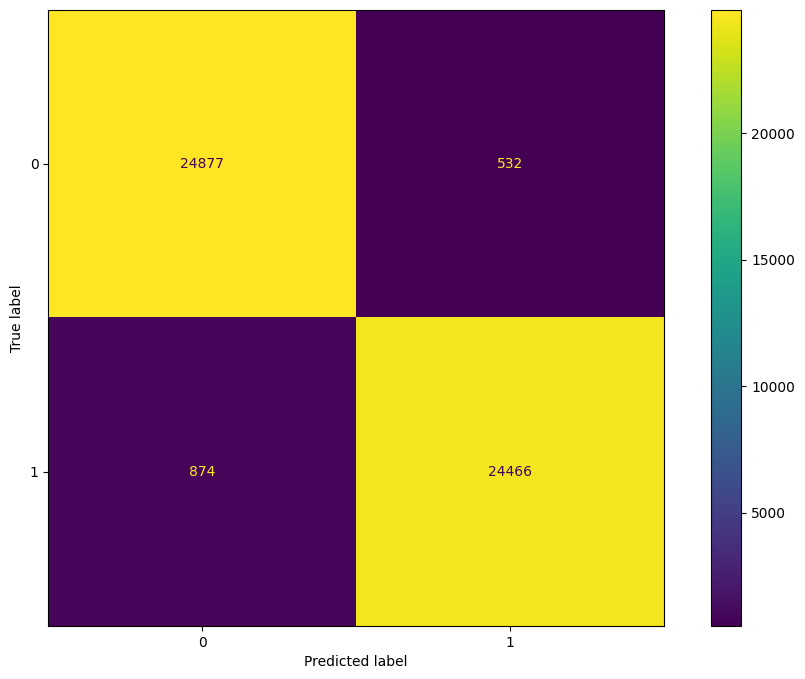

In [64]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

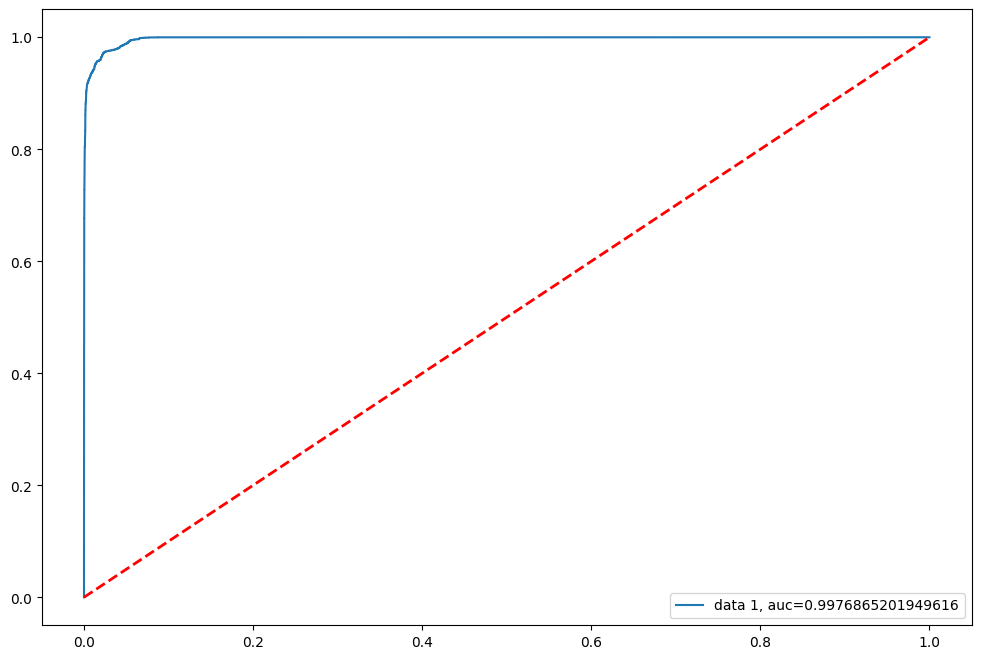

In [65]:
y_pred_proba =  rf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

In [66]:
classifiers = [
    LogisticRegression(max_iter=1000, random_state=SEED),
    DecisionTreeClassifier(max_depth = 5, random_state=SEED),
    RandomForestClassifier(max_depth= 5, random_state = SEED)]

LogisticRegression
****Resultados****
Accuracy: 0.9417722516699837
Precision: 0.9241993556945234
Recall: 0.9623125493291239
F1: 0.9428709521507975
DecisionTreeClassifier
****Resultados****
Accuracy: 0.9595065912628821
Precision: 0.9379678742053192
Recall: 0.9839779005524862
F1: 0.9604221635883906
RandomForestClassifier
****Resultados****
Accuracy: 0.9722950205915387
Precision: 0.9787182974637971
Recall: 0.9655090765588004
F1: 0.9720688148118718


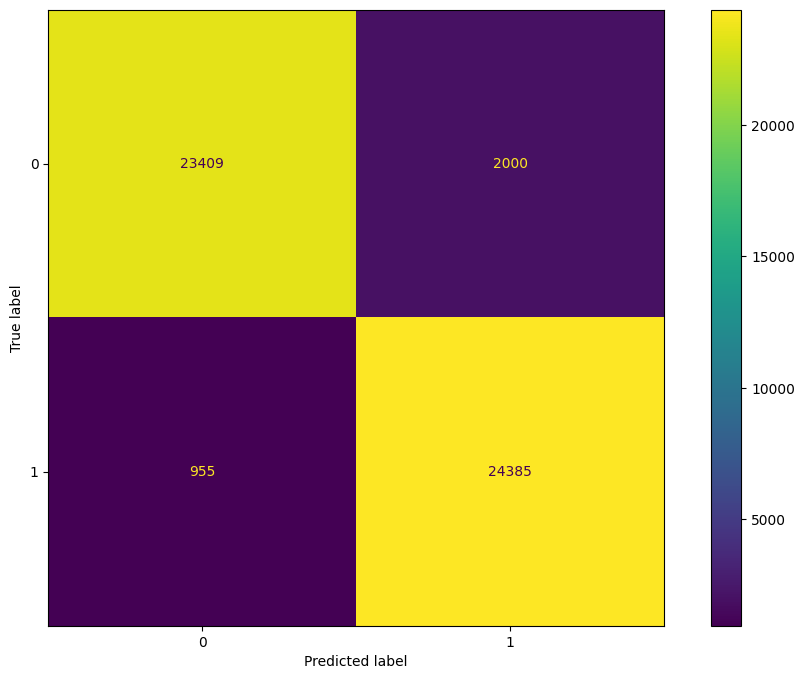

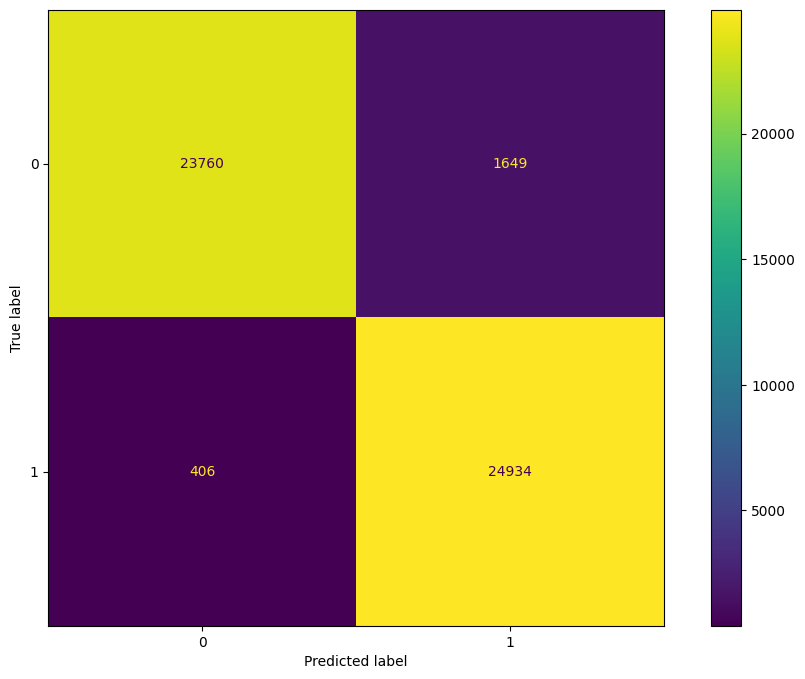

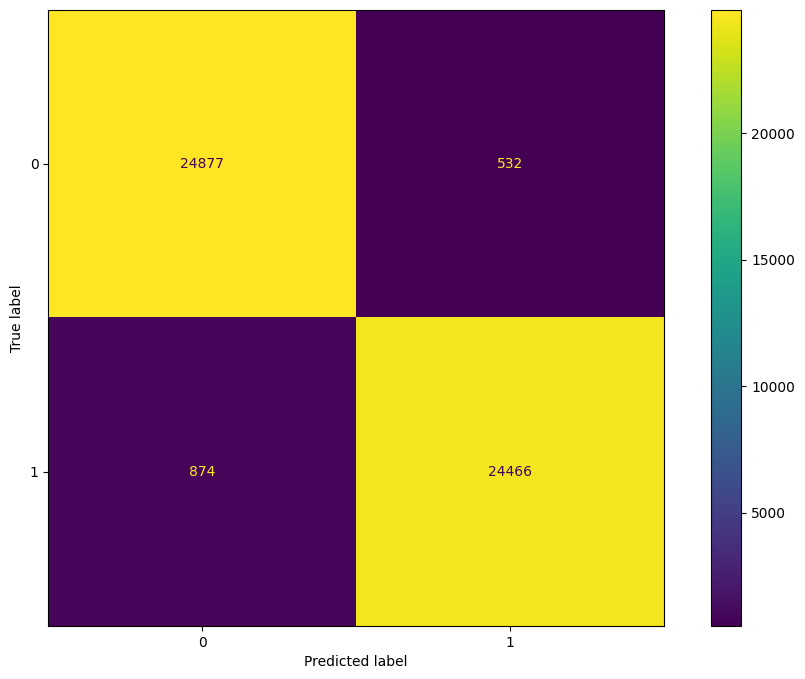

In [67]:
for clf in classifiers:
  clf.fit(x_train, y_train)
  name = clf.__class__.__name__
  print("="*30)
  print(name)
  print('****Resultados****')
  y_pred = clf.predict(x_test)
  print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
  print("Precision:", metrics.precision_score(y_test, y_pred))
  print("Recall:", metrics.recall_score(y_test, y_pred))
  print("F1:", metrics.f1_score(y_test, y_pred))

  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()

In [68]:
n_estimators = np.arange(20, 200, step=20)
criterion = ["gini", "entropy"]
max_features = ["auto", "sqrt", "log2"]
max_depth = list(np.arange(2, 10, step=1))
min_samples_split = np.arange(2, 10, step=2)
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [69]:
param_grid = {
    "n_estimators": n_estimators,
    "criterion": criterion,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap,
}

In [70]:
from sklearn.model_selection import RandomizedSearchCV

SEED = 70

rforest = RandomForestClassifier(random_state=SEED)

In [71]:
random_cv = RandomizedSearchCV(
    rforest, param_grid, n_iter=5, cv=3, scoring="recall", n_jobs=-1, random_state = SEED
)


In [76]:
print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred)) 
print("F1:",metrics.f1_score(y_test, y_pred))

Acurácia: 0.9722950205915387
Precisão: 0.9787182974637971
Recall: 0.9655090765588004
F1: 0.9720688148118718


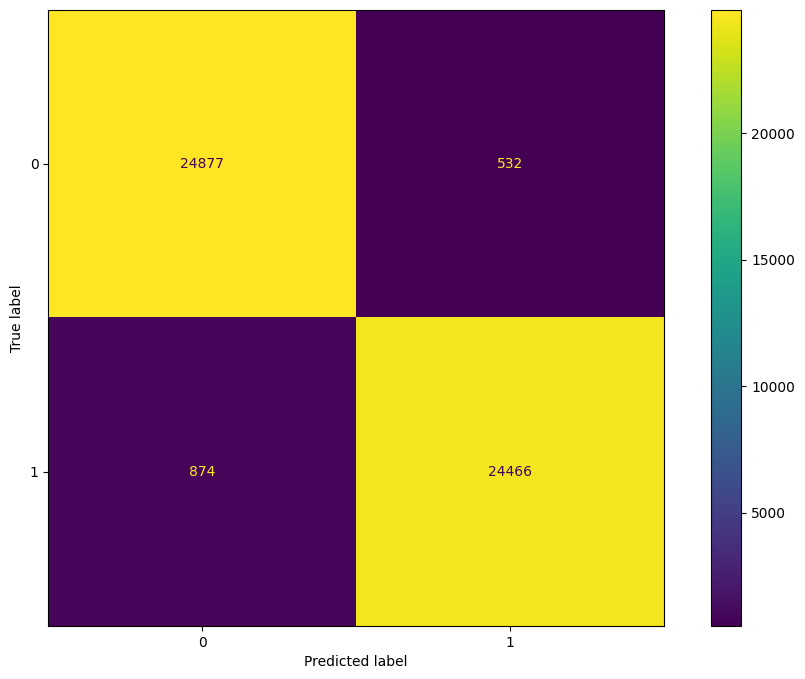

In [77]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()